In [48]:
import numpy as np
import tensorflow as tf
import pickle

from scipy.misc import imrotate

import matplotlib.pyplot as plt 
%matplotlib inline

from functions.build_constant_network import build_network
from functions.multiple_bar_plot import multiple_bar_plot

import random
import copy


PATH = '/home/claudia/Dokumente/Uni/lab_rotation_TU/compare_AER_AEUR'
FIGURES = '/home/claudia/Dokumente/Uni/lab_rotation_TU/compare_AER_AEUR/report/figures/'

In [2]:
DATA = pickle.load(open(PATH +'/datasets/all_mnist_variants_scipy_rotate.p', 'rb'))
#DATA = pickle.load(open(PATH +'/datasets/all_rotated_data_info.p', 'rb'))
LABELS = DATA['labels']

In [3]:
im = np.reshape(DATA['mnist'][15], (28,28))
im30 = imrotate(im, 60, interp='bilinear')

(-0.5, 27.5, 27.5, -0.5)

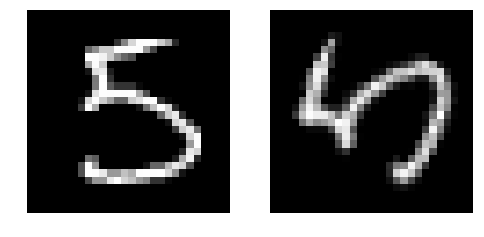

In [4]:
plt.figure(figsize = (8, 5))
plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(im30, cmap='gray')
plt.axis('off')

In [5]:
AEUR_file = PATH + '/network_params/AEUR_finetuned_params_complete.p'
AEUR_params = pickle.load(open(AEUR_file, 'rb'))

W_AEUR = AEUR_params['weights_incl_softmax']
B_AEUR = AEUR_params['bias_incl_softmax']

x_AEUR, y_AEUR, weights_AEUR, bias_AEUR, activations_AEUR, measures_AEUR = \
build_network(W_AEUR, B_AEUR) 

In [6]:
AER_file = PATH + '/network_params/AER_finetuned_params_complete.p'
AER_params = pickle.load(open(AER_file, 'rb'))

W_AER = AER_params['weights_incl_softmax']
B_AER = AER_params['bias_incl_softmax']

x_AER, y_AER, weights_AER, bias_AER, activations_AER, measures_AER = \
build_network(W_AER, B_AER) 

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [7]:
mnist = DATA['mnist']
mnist_mix = DATA['mnist_mix']

In [8]:
acc_AER_0 = sess.run(measures_AER['accuracy'], \
                     feed_dict = {x_AER: mnist.T, y_AER: LABELS.T})

acc_AER_mix = sess.run(measures_AER['accuracy'], \
                     feed_dict = {x_AER: mnist_mix.T, y_AER: LABELS.T})

acc_AEUR_0 = sess.run(measures_AEUR['accuracy'], \
                     feed_dict = {x_AEUR: mnist.T, y_AEUR: LABELS.T})

acc_AEUR_mix = sess.run(measures_AEUR['accuracy'], \
                     feed_dict = {x_AEUR: mnist_mix.T, y_AEUR: LABELS.T})

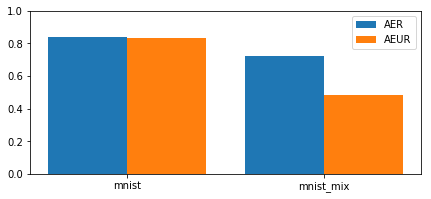

In [9]:
plt.figure(figsize = (7, 3))
plt.bar([0,1], [acc_AER_0, acc_AER_mix ], width = .4, label = 'AER')
plt.bar([.4,1.4], [acc_AEUR_0, acc_AEUR_mix ], width = .4, label = 'AEUR')
plt.xticks([0.2,1.2], ['mnist' , 'mnist_mix'])
plt.legend()
plt.ylim(0,1)
plt.show()

In [10]:
import seaborn as sns
sns.set()

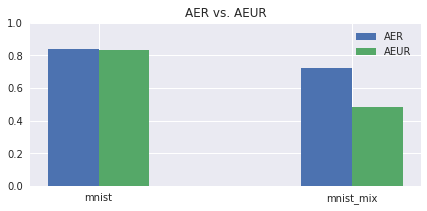

In [11]:
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize = (7, 3))
plt.bar([0,1], [acc_AER_0, acc_AER_mix ], width = .2, label = 'AER')
plt.bar([.2,1.2], [acc_AEUR_0, acc_AEUR_mix ], width = .2, label = 'AEUR')
plt.xticks([0.1,1.1], ['mnist' , 'mnist_mix'])
plt.legend()
plt.ylim(0,1)
#plt.show()
plt.title('AER vs. AEUR')
#plt.savefig('AERvsAEUR_general.png')

In [12]:
sets = ['mnist_neg90', 'mnist_neg60', 'mnist_neg30', 'mnist', 'mnist_30', \
        'mnist_60', 'mnist_90', 'mnist_mix']

N = len(sets)
acc_AER = np.zeros(N)
acc_AEUR = np.zeros(N)


for i in range(N): 
    acc_AER[i] = sess.run(measures_AER['accuracy'], \
                     feed_dict = {x_AER: DATA[sets[i]].T, y_AER: LABELS.T})

    acc_AEUR[i] = sess.run(measures_AEUR['accuracy'], \
                     feed_dict = {x_AEUR: DATA[sets[i]].T, y_AEUR: LABELS.T})

In [39]:
  # crazy big
sns.set_context("paper")


#matplotlib.rcParams.update({'font.size': 22})



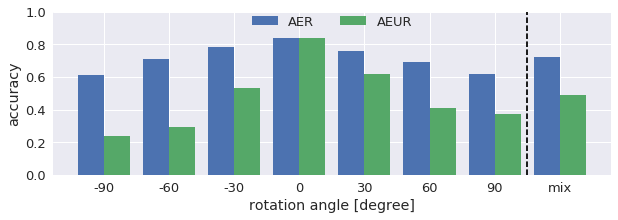

In [59]:
angles = ['-90', '-60', '-30', '0', '30', '60', '90', 'mix']
sns.set(font_scale=1.3)
plt.figure(figsize = (10, 3))
plt.bar(range(N), acc_AER, width = .4, label = 'AER')
plt.bar([i+.4 for i in range(N)], acc_AEUR, width = .4, label = 'AEUR')
plt.axvline(x = 6.7,  color='k', linestyle='--')
plt.xticks([i + .2 for i in range(N)], angles)
plt.legend()
plt.ylim(0,1)
plt.xlabel('rotation angle [degree]')
plt.ylabel('accuracy')
#plt.title('Accuracy Comparison for different Rotations of Dataset')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig(FIGURES+ 'AERvsAEUR_angles.png',  bbox_inches='tight')
plt.show()

In [14]:
IDX = DATA['digit_idx']

In [15]:
D = 10
acc_AER_0 = np.zeros(D)
acc_AEUR_0 = np.zeros(D)

acc_AER_mix = np.zeros(D)
acc_AEUR_mix = np.zeros(D)



for i in range(D):
    idx = IDX['only_'+str(i)]
    acc_AER_0[i] = sess.run(measures_AER['accuracy'], \
                     feed_dict = {x_AER: mnist[idx].T, y_AER: LABELS[idx].T})

    acc_AEUR_0[i] = sess.run(measures_AEUR['accuracy'], \
                     feed_dict = {x_AEUR: mnist[idx].T, y_AEUR: LABELS[idx].T})
    
    acc_AER_mix[i] = sess.run(measures_AER['accuracy'], \
                     feed_dict = {x_AER: mnist_mix[idx].T, y_AER: LABELS[idx].T})

    acc_AEUR_mix[i] = sess.run(measures_AEUR['accuracy'], \
                     feed_dict = {x_AEUR: mnist_mix[idx].T, y_AEUR: LABELS[idx].T})
    
    

In [16]:
acc_AER_0

array([ 0.96734697,  0.97797358,  0.77810079,  0.78019804,  0.76272911,
        0.78026909,  0.84759915,  0.81031126,  0.85215604,  0.83448958])

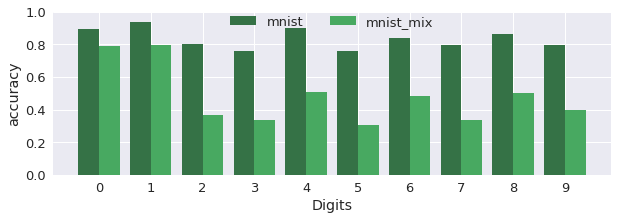

In [57]:
g = sns.color_palette("Greens_d")
sns.set(font_scale=1.3)

plt.figure(figsize = (10, 3))
plt.bar(range(D), acc_AEUR_0, width = .4, label = 'mnist', color = g[1])
plt.bar([i+.4 for i in range(D)], acc_AEUR_mix, width = .4, label = 'mnist_mix', color = g[3])
plt.xticks([i+.2 for i in range(D)], [i for i in range(D)])
#plt.legend()
plt.ylim(0,1)
plt.xlabel('Digits')
plt.ylabel('accuracy')
#plt.title('AEUR accuracy for single digits rotated and unrotated')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig(FIGURES + 'AEUR_digits.png',bbox_inches='tight' )
plt.show()

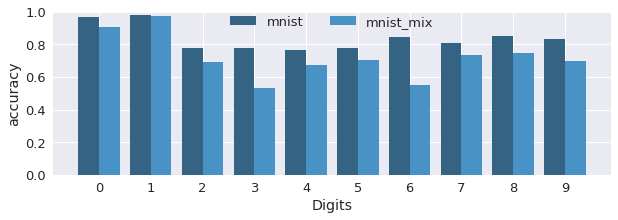

In [56]:
b = sns.color_palette("Blues_d")

plt.figure(figsize = (10, 3))
plt.bar(range(D), acc_AER_0, width = .4, label = 'mnist', color = b[1])
plt.bar([i+.4 for i in range(D)], acc_AER_mix, width = .4, label = 'mnist_mix', color = b[3])
plt.xticks([i+.2 for i in range(D)], [i for i in range(D)])
#plt.legend()
plt.ylim(0,1)
plt.xlabel('Digits')
plt.ylabel('accuracy')
#plt.title('AER accuracy for single digits rotated and unrotated')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig(FIGURES+ 'AER_digits.png', bbox_inches='tight' )
plt.show()

In [19]:
def spike_triggered_average(layer, idx, neuron = 2, network = 'AER', \
                            dataset = 'mnist'): 
    
    samples = len(idx)
    
    if network == 'AER': 
        y = sess.run(layer, feed_dict={x_AER: DATA[dataset][idx].T, y_AER: LABELS[idx].T})
    elif network == 'AEUR': 
        y = sess.run(layer, feed_dict={x_AEUR: DATA[dataset][idx].T, y_AEUR: LABELS[idx].T})
    
    im = np.zeros((28,28))    

    for i in range(samples):
        if np.argmax(y[:, i]) == neuron: 
            im += np.reshape(DATA[dataset][idx[i]], (28, 28))

    return im

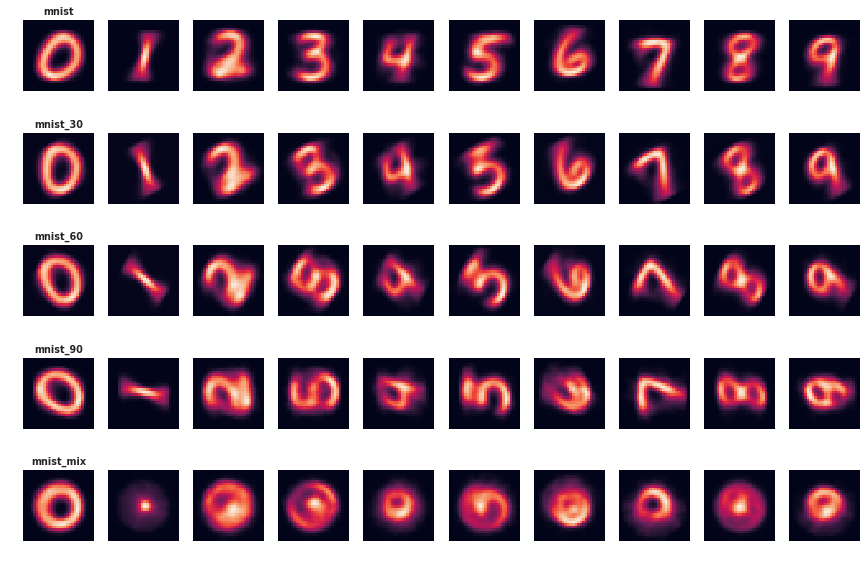

In [20]:
idx = np.random.randint(0, high = 10000, size = 5000)
datasets = ['mnist', 'mnist_30', 'mnist_60', 'mnist_90', 'mnist_mix']

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for j, d in enumerate(datasets): 
    
    lay = activations_AER['y_']
    for i in range(10): 
        im = spike_triggered_average(lay, idx, neuron = i, network = 'AER', dataset = d)
        plt.subplot(5,10,10*j + i+1)
        plt.imshow(im)
        plt.axis('off')
        if i == 0: 
            plt.title(d, fontweight="bold")
#plt.show()
plt.savefig('STA_Softmax_AER.png', bbox_inches='tight')





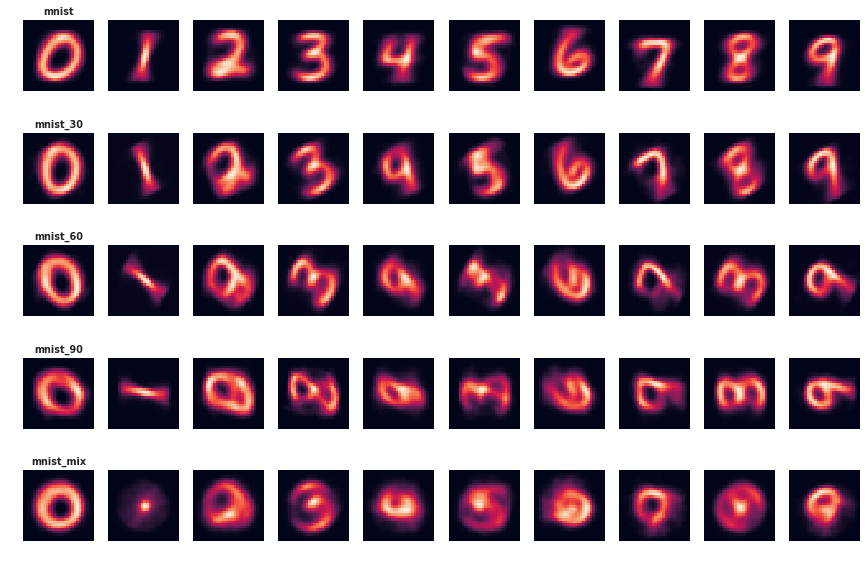

In [21]:
idx = np.random.randint(0, high = 10000, size = 5000)
datasets = ['mnist', 'mnist_30', 'mnist_60', 'mnist_90', 'mnist_mix']

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for j, d in enumerate(datasets): 
    
    lay = activations_AEUR['y_']
    for i in range(10): 
        im = spike_triggered_average(lay, idx, neuron = i, network = 'AEUR', dataset = d)
        plt.subplot(5,10,10*j + i+1)
        plt.imshow(im)
        plt.axis('off')
        if i == 0: 
            plt.title(d, fontweight="bold")
plt.savefig('STA_Softmax_AEUR.png', bbox_inches='tight')

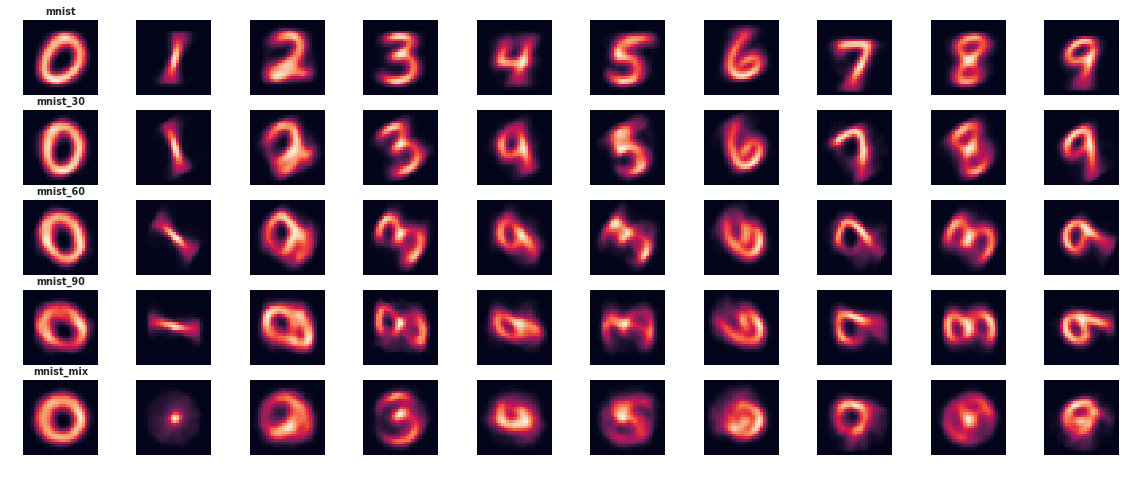

In [22]:
idx = np.random.randint(0, high = 10000, size = 5000)
datasets = ['mnist', 'mnist_30', 'mnist_60', 'mnist_90', 'mnist_mix']

fig = plt.figure(figsize = (20, 8))

plt.subplot(2,1,1)
for j, d in enumerate(datasets): 
    
    lay = activations_AER['y_']
    for i in range(10): 
        im = spike_triggered_average(lay, idx, neuron = i, network = 'AER', dataset = d)
        plt.subplot(5,10,10*j + i+1)
        plt.imshow(im)
        plt.axis('off')
        if i == 0: 
            plt.title(d, fontweight="bold")

plt.subplot(2,1,2)
for j, d in enumerate(datasets): 
    
    lay = activations_AEUR['y_']
    for i in range(10): 
        im = spike_triggered_average(lay, idx, neuron = i, network = 'AEUR', dataset = d)
        plt.subplot(5,10,10*j + i+1)
        plt.imshow(im)
        plt.axis('off')
        if i == 0: 
            plt.title(d, fontweight="bold")
plt.show()


### Correlations




In [23]:
import pandas as pd

In [24]:
idx = np.random.randint(0, high = 10000, size = 5000)
layers = ['h_1', 'h_2', 'h_3', 'h_4']
Dists1= np.zeros((4, len(idx)))
Dists2= np.zeros((4, len(idx)))
Dists3= np.zeros((4, len(idx)))


                 
for i, lay in enumerate(layers): 
    a = sess.run(activations_AER[lay], feed_dict = {x_AER: DATA['mnist'][idx].T, y_AER: LABELS[idx].T})
    b = sess.run(activations_AER[lay], feed_dict = {x_AER: DATA['mnist_mix'][idx].T, y_AER: LABELS[idx].T})
    
    c = sess.run(activations_AER[lay], feed_dict = {x_AER: DATA['mnist_30'][idx].T, y_AER: LABELS[idx].T})
    d = sess.run(activations_AER[lay], feed_dict = {x_AER: DATA['mnist_neg60'][idx].T, y_AER: LABELS[idx].T})
    
    e = sess.run(activations_AER[lay], feed_dict = {x_AER: DATA['mnist_60'][idx].T, y_AER: LABELS[idx].T})
    f = sess.run(activations_AER[lay], feed_dict = {x_AER: DATA['mnist_neg30'][idx].T, y_AER: LABELS[idx].T})
    
    for j in range(a.shape[1]):
        Dists1[i,j] = np.linalg.norm(a[:, j] - b[:, j])
        Dists2[i,j] = np.linalg.norm(c[:, j] - d[:, j])
        Dists3[i,j] = np.linalg.norm(e[:, j] - f[:, j])

In [60]:
dataframe = {}
layer_list = []
neg60_vs_30 = []
neg30_vs_60 = []
mnist_vs_mix = []
for i in range(4): 
    for j in range(len(idx)):
        layer_list.append('Layer '+str(i+1))
        mnist_vs_mix.append(Dists1[i,j])
        neg60_vs_30.append(Dists2[i,j])
        neg30_vs_60.append(Dists3[i,j])

dataframe['layers'] = layer_list
dataframe['mnist_vs_mix'] = mnist_vs_mix
dataframe['neg60_vs_30'] = neg60_vs_30
dataframe['neg30_vs_60'] = neg30_vs_60

In [26]:
df = pd.DataFrame(dataframe)
dd=pd.melt(df,id_vars=['layers'],value_vars=['mnist_vs_mix', 'neg60_vs_30','neg30_vs_60'],var_name='Differences')


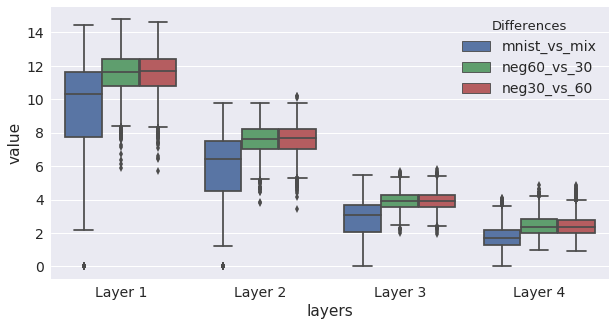

In [63]:
plt.figure(figsize = (10, 5))
sns.set(font_scale=1.4)
sns.boxplot(x='layers',y='value',data=dd,hue='Differences')
plt.savefig(FIGURES + 'euc_diffs.png')